### Setup


In [15]:
import deeplake
from deeplake import Dataset
from plots import plot

ds: Dataset = deeplake.load("hub://activeloop/icdar-2013-text-localize-train")


class iArray(list):
    def map(self, *functions):
        result = self
        for func in functions:
            result = list(map(func, result))
        return iArray(result)

    def show(self, img):
        plot([img, *self])

|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/icdar-2013-text-localize-train



/

hub://activeloop/icdar-2013-text-localize-train loaded successfully.



### Bilateral Filters


#### Standard Bilateral Filter


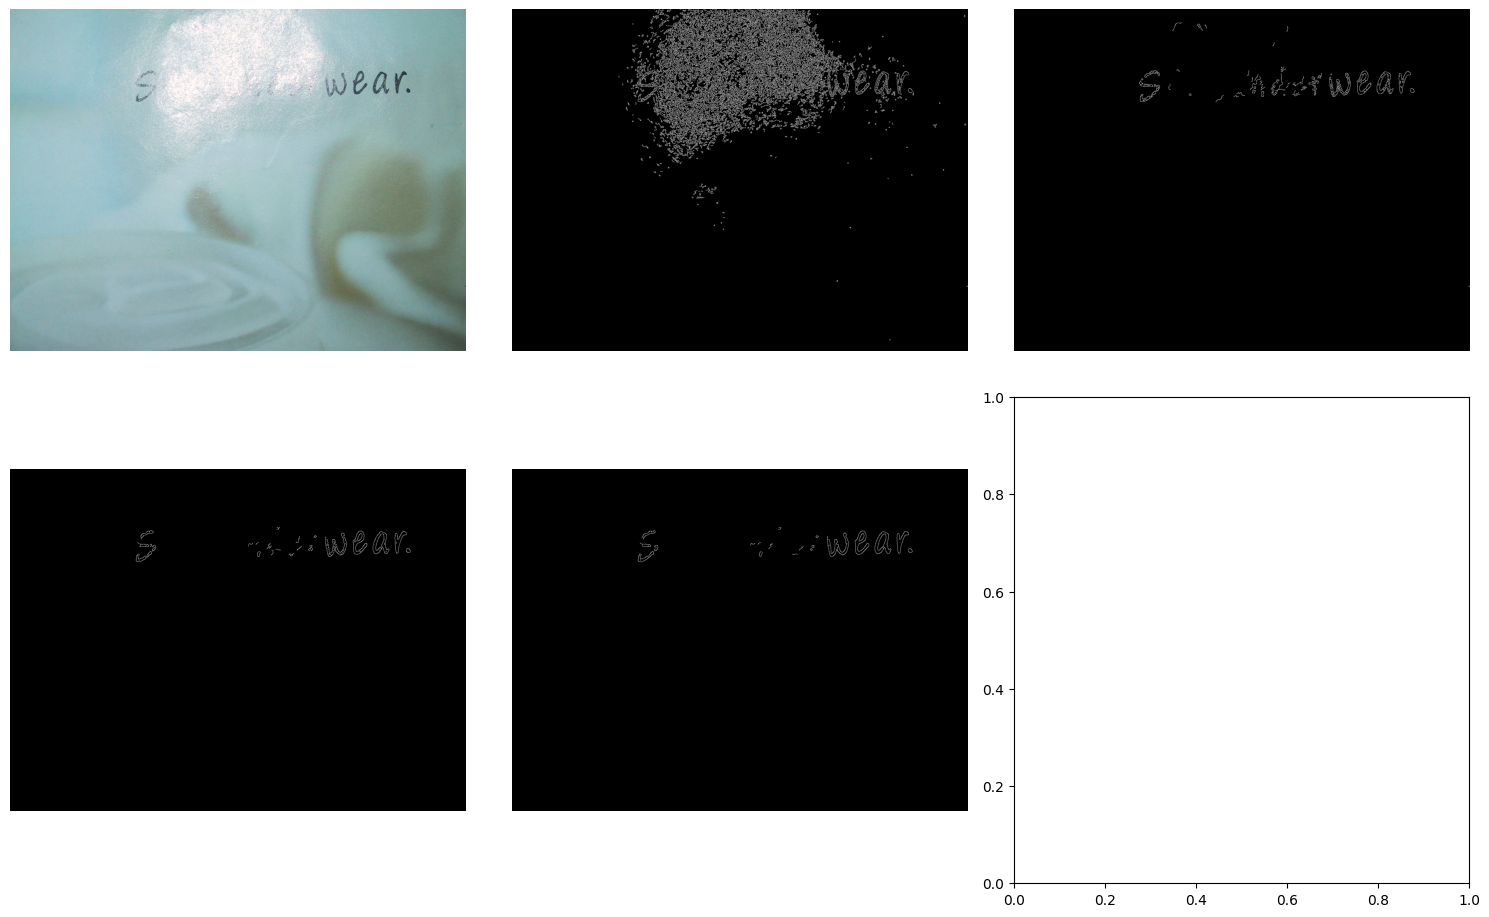

In [17]:
import cv2
from random import randint
from skimage.color import rgb2gray
from skimage.feature import canny

idx = randint(0, 230)
idx = 200
img = ds.images[idx].numpy()

iters = [cv2.bilateralFilter(img, 9, i, i) for i in range(100, 400, 100)]
imgs = iArray([img, *iters]).map(rgb2gray, canny).show(img)